# Act 2. Color segmentation


Utilizar la imagen bags.png de CANVAS y separar los colores de cada una de las bolsas que aparecen ahi. 
El resultado final deberá ser una imagen para cada bolsa distinta y una imagen que incluya todas las bolsas sin el fondo.

In [135]:
import sys
print(sys.executable)

C:\Users\jenny\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe


In [136]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import cv2
from matplotlib.colors import hsv_to_rgb


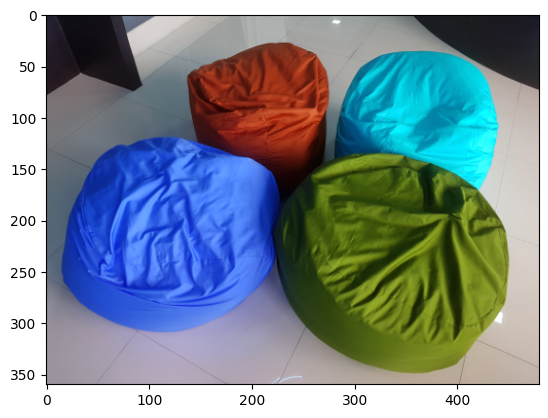

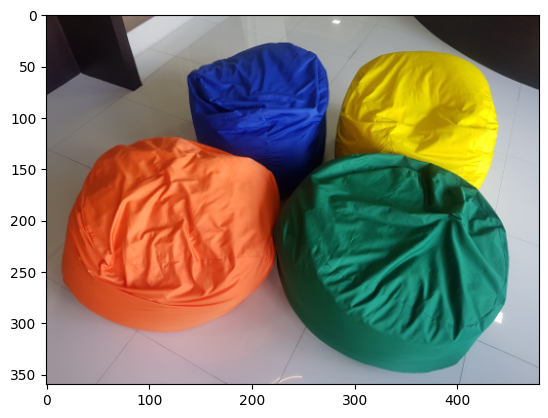

In [137]:
img = cv2.imread('bags.png')
plt.imshow(img)
plt.show()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

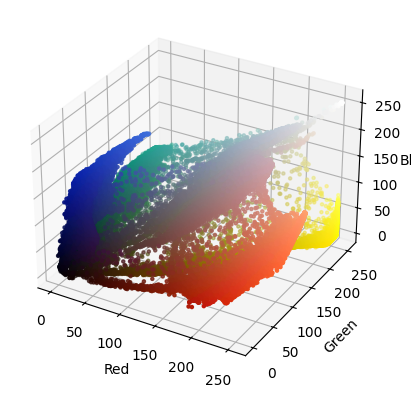

In [138]:
r,g,b =cv2.split(img)
fig =plt.figure()

axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = img.reshape((np.shape(img)[0] * np.shape(img)[1], 3))
norm =colors.Normalize(vmin=-1, vmax=1)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors= pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

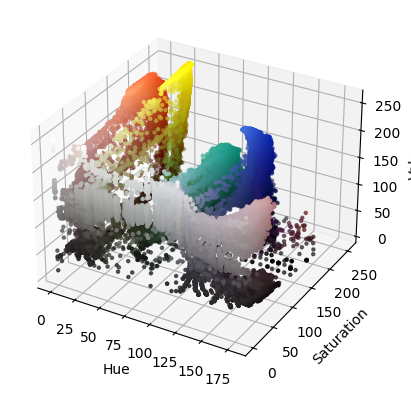

In [139]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors= pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

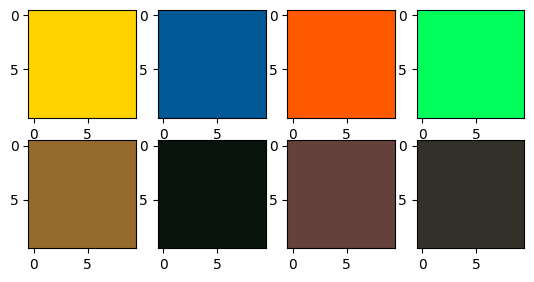

In [140]:
# hsv
# value- más abajo más oscuro 
# saturation- más abajo más claro
# hue color
l_yellow = (25, 180, 150)
l_blue = (100, 140, 20) 
l_orange = (5, 100, 100)
l_green = (35, 50, 50)

d_yellow = (35, 255, 255)
d_blue =(145, 255, 150)
d_orange = (15, 255, 255)
d_green = (100, 255, 255)


lyellow_square = np.full((10,10,3), l_yellow, dtype=np.uint8)/255.0
lblue_square = np.full((10,10,3), l_blue, dtype=np.uint8)/255.0
lorange_square = np.full((10,10,3), l_orange, dtype=np.uint8)/255.0
lgreen_square = np.full((10,10,3), l_green, dtype=np.uint8)/255.0

dyellow_square = np.full((10,10,3), d_yellow, dtype=np.uint8)/255.0
dblue_square = np.full((10,10,3), d_blue, dtype=np.uint8)/255.0
dorange_square = np.full((10,10,3), d_orange, dtype=np.uint8)/255.0
dgreen_square = np.full((10,10,3), d_green, dtype=np.uint8)/255.0

plt.subplot(1, 4, 1)
plt.imshow(hsv_to_rgb(lyellow_square))
plt.subplot(1, 4, 2)
plt.imshow(hsv_to_rgb(lblue_square))
plt.subplot(1, 4, 3)
plt.imshow(hsv_to_rgb(lorange_square))
plt.subplot(1, 4, 4)
plt.imshow(hsv_to_rgb(lgreen_square))
plt.subplot(3, 4, 1)
plt.imshow(hsv_to_rgb(dyellow_square))
plt.subplot(3, 4, 2)
plt.imshow(hsv_to_rgb(dblue_square))
plt.subplot(3, 4, 3)
plt.imshow(hsv_to_rgb(dorange_square))
plt.subplot(3, 4, 4)
plt.imshow(hsv_to_rgb(dgreen_square))
plt.show()

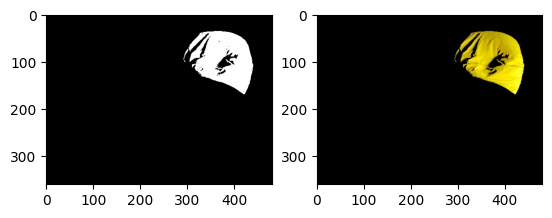

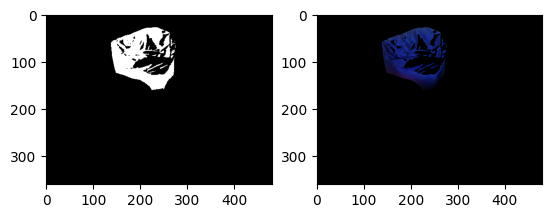

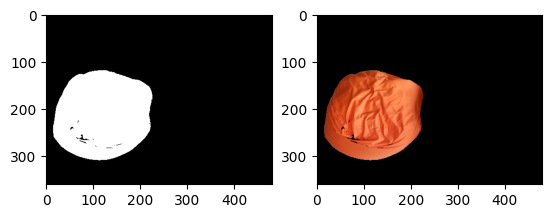

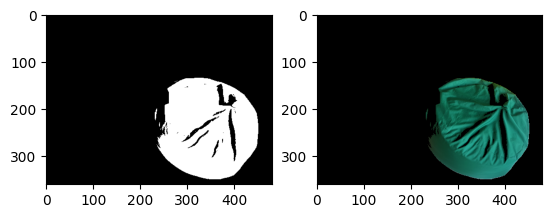

In [141]:
mask_yellow = cv2.inRange(hsv_img, l_yellow, d_yellow)
result_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

mask_blue = cv2.inRange(hsv_img, l_blue, d_blue)
result_blue = cv2.bitwise_and(img, img, mask=mask_blue)

mask_orange= cv2.inRange(hsv_img, l_orange, d_orange)
result_orange = cv2.bitwise_and(img, img, mask=mask_orange)

mask_green = cv2.inRange(hsv_img, l_green, d_green)
result_green = cv2.bitwise_and(img, img, mask=mask_green)

plt.subplot(1, 2, 1)
plt.imshow(mask_yellow, cmap= "gray")
plt.subplot(1, 2, 2)
plt.imshow(result_yellow)
plt.show()
plt.subplot(1, 2, 1)
plt.imshow(mask_blue, cmap= "gray")
plt.subplot(1, 2, 2)
plt.imshow(result_blue)
plt.show()
plt.subplot(1, 2, 1)
plt.imshow(mask_orange, cmap= "gray")
plt.subplot(1, 2, 2)
plt.imshow(result_orange)
plt.show()
plt.subplot(1, 2, 1)
plt.imshow(mask_green, cmap= "gray")
plt.subplot(1, 2, 2)
plt.imshow(result_green)
plt.show()

Como se puede ver en las imágenes anteriores, no se logró separar correctamente las bolsas. Esto ocurrió porque la combinación de colores claros y oscuros no fue óptima. Al cambiar uno de los colores, el patrón se alteraba, lo que dificultaba obtener los colores deseados.

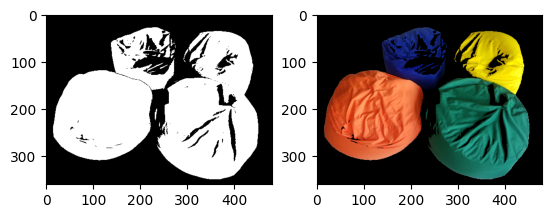

In [142]:
mask = cv2.add(mask_yellow, mask_blue)
mask = cv2.add(mask, mask_orange)
mask = cv2.add(mask, mask_green)
result_mask = cv2.bitwise_and(img, img, mask=mask)
plt.subplot(1, 2, 1)

plt.imshow(mask, cmap= "gray")
plt.subplot(1, 2, 2)
plt.imshow(result_mask)
plt.show()

In [143]:

from skimage.io import imread, imshow
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt


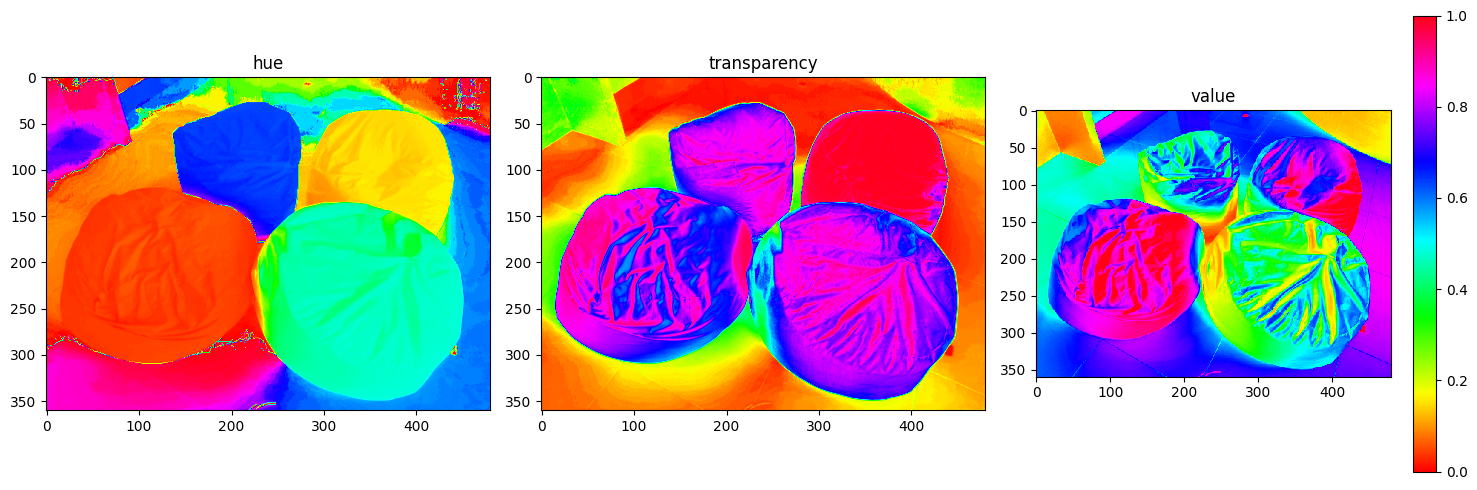

In [144]:

img = cv2.imread('bags.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hsv_img = rgb2hsv(img)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(hsv_img[:, :, 0], cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(hsv_img[:, :, 1], cmap='hsv')
ax[1].set_title('transparency')
ax[2].imshow(hsv_img[:, :, 2], cmap='hsv')
ax[2].set_title('value')
fig.colorbar(imshow(hsv_img[:, :, 2], cmap='hsv'))
fig.tight_layout()
plt.show()


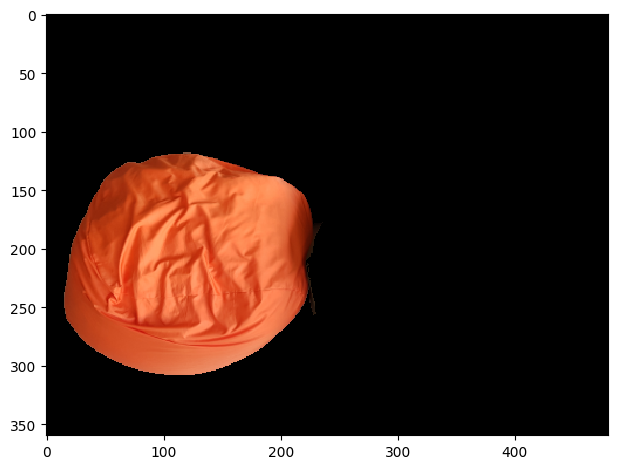

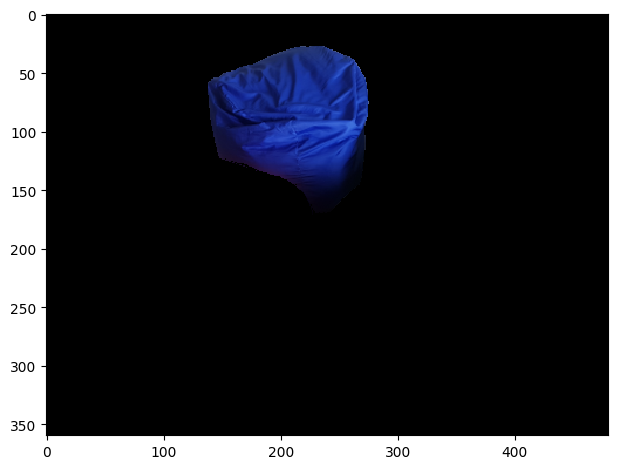

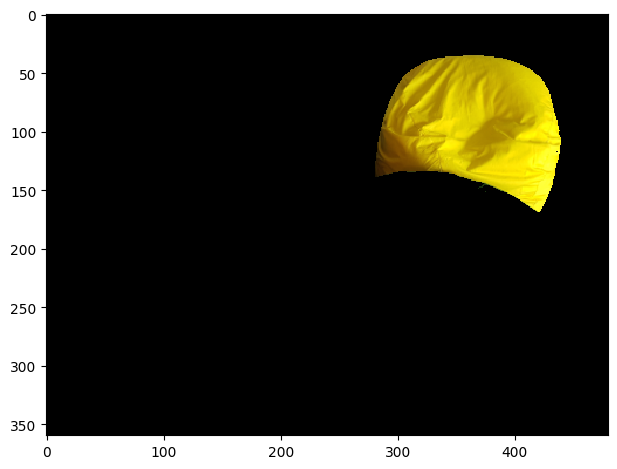

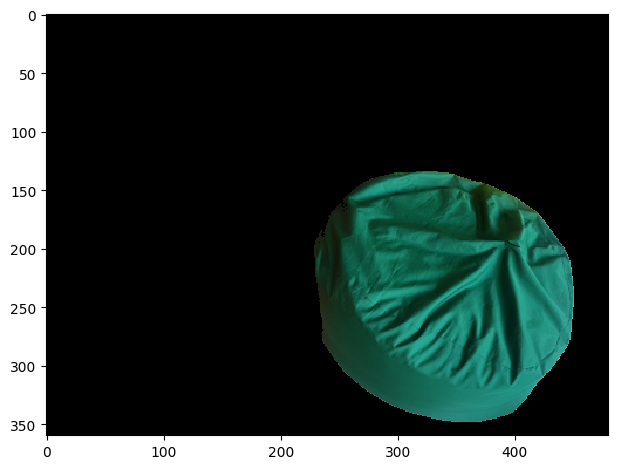

In [145]:
# orange
l_mask_o = hsv_img[:, :,0] > 0.0  #parte baja de hue
u_mask_o = hsv_img[:, :,0] < 0.08 #parte alta de hue
sat_mask_o = hsv_img[:, :,1] > 0.5 #transparency

omask = l_mask_o * u_mask_o * sat_mask_o
ored = img[:, :, 0] * omask
ogreen = img[:, :, 1] * omask
oblue= img[:, :, 2] * omask
oimg_masked = np.dstack((ored,ogreen,oblue))
imshow(oimg_masked)
plt.show()


# blue
l_mask_b = hsv_img[:, :,0] > 0.57  #parte baja de hue
u_mask_b = hsv_img[:, :,0] < 0.75  #parte alta de hue
sat_mask_b = hsv_img[:, :,1] > 0.4 #transparency

bmask = l_mask_b * u_mask_b * sat_mask_b
bred = img[:, :, 0] * bmask
bgreen = img[:, :, 1] * bmask
bblue= img[:, :, 2] * bmask
bimg_masked = np.dstack((bred,bgreen,bblue))
imshow(bimg_masked)
plt.show()

# yellow
l_mask_y = hsv_img[:, :,0] > 0.07  #parte baja de hue
u_mask_y = hsv_img[:, :,0] < 0.3  #parte alta de hue
sat_mask_y = hsv_img[:, :,1] > 0.7 #transparency

ymask = l_mask_y * u_mask_y * sat_mask_y
yred = img[:, :, 0] * ymask
ygreen = img[:, :, 1] * ymask
yblue= img[:, :, 2] * ymask
yimg_masked = np.dstack((yred,ygreen,yblue))
imshow(yimg_masked)
plt.show()

# green
l_mask_g = hsv_img[:, :,0] > 0.2  #parte baja de hue
u_mask_g = hsv_img[:, :,0] < 0.5  #parte alta de hue
sat_mask_g = hsv_img[:, :,1] > 0.25 #transparency

gmask = l_mask_g * u_mask_g * sat_mask_g
gred = img[:, :, 0] * gmask
ggreen = img[:, :, 1] * gmask
gblue= img[:, :, 2] * gmask
gimg_masked = np.dstack((gred,ggreen,gblue))
imshow(gimg_masked)
plt.show()



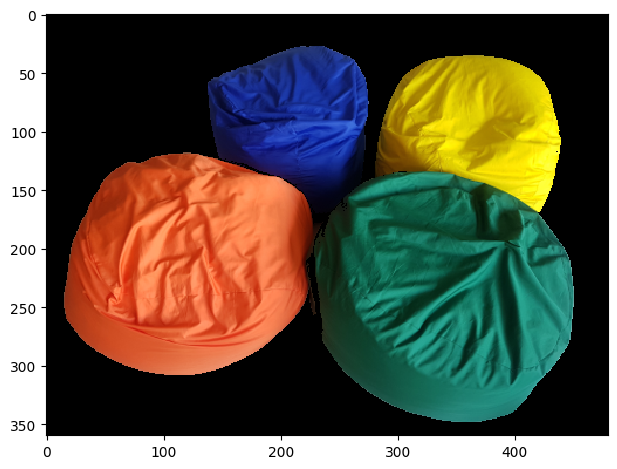

In [146]:
imgfinal = oimg_masked | yimg_masked | bimg_masked | gimg_masked
imshow(imgfinal)
plt.show()